In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


## Cleaning numerical data

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
display(customer_df.head())
display(customer_df.shape)
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

In [4]:
#convert the column names to lower case
customer_df.columns=customer_df.columns.str.lower()

#White spaces in column names should be replaced by _

customer_df.columns = customer_df.columns.str.replace(' ', '_') 
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df

C:\Users\jorda\AppData\Local\Temp\ipykernel_4320\2047604351.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
numerical_df = customer_df.select_dtypes(include='number')
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [7]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [8]:
def label_numerical_columns(df):
    continuous_cols = []
    discrete_cols = []

    for col in df.columns:
        unique_values = df[col].nunique()
        if unique_values > 210:
            continuous_cols.append(col)
        else:
            discrete_cols.append(col)

    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]

    return continuous_df, discrete_df


In [9]:
continuous_df, discrete_df = label_numerical_columns(numerical_df)

In [10]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [11]:
discrete_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


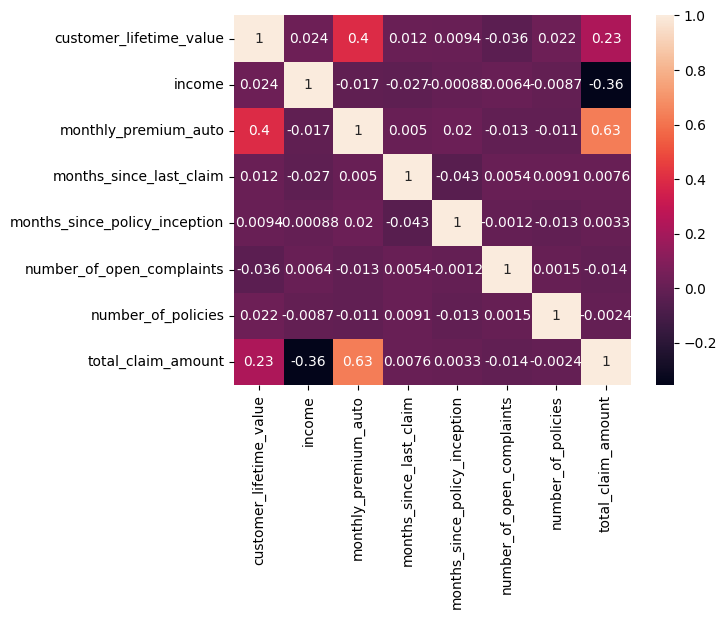

In [12]:
correlations_matrix = numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

We see that the discrete values despite monthly_premium_auto have a low correlation with total_claim_amount.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_discrete_var(df):
    for col in df.columns:
        sns.countplot(x=col, data=df)
        plt.title(f"Count Plot for {col}")
        plt.show()

def plot_continuous_var(df):
    for col in df.columns:
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

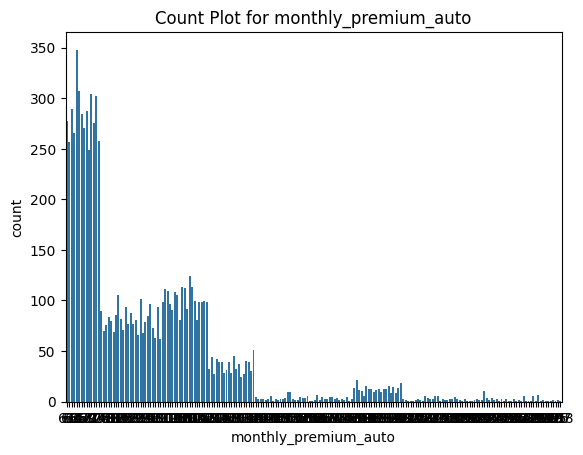

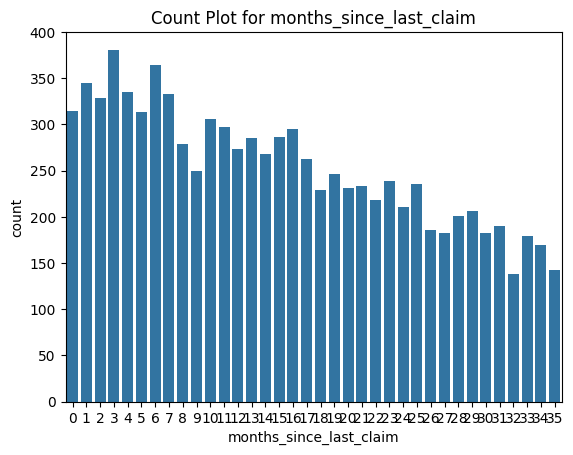

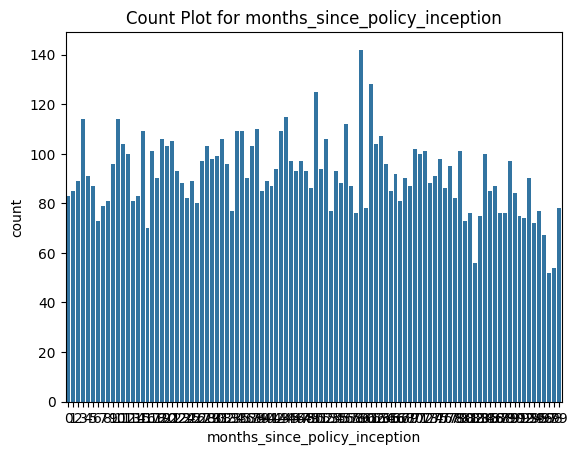

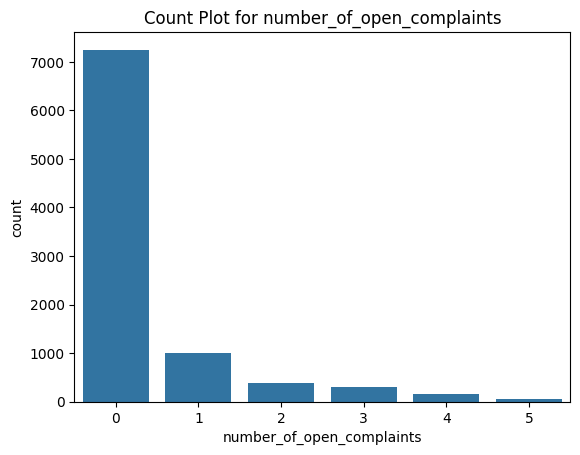

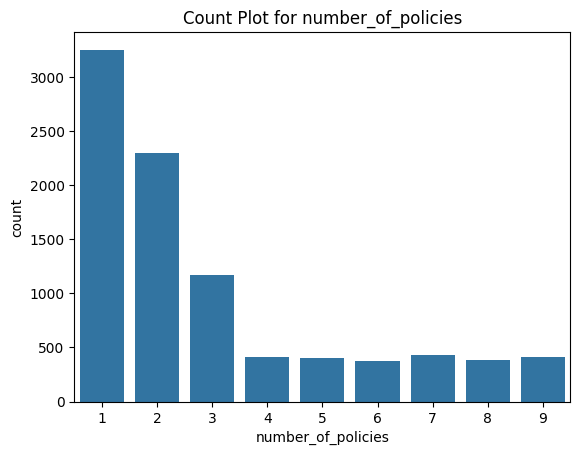

In [14]:
plot_discrete_var(discrete_df)

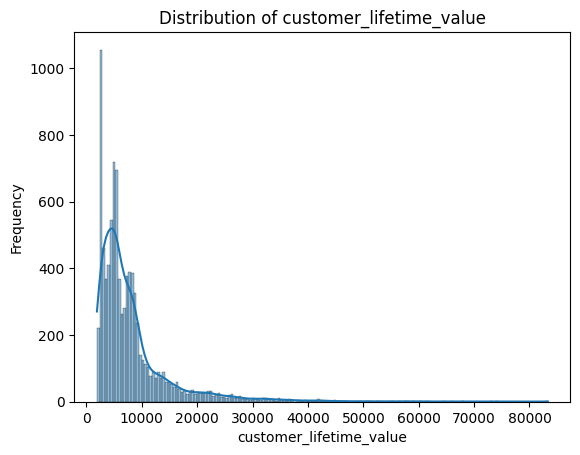

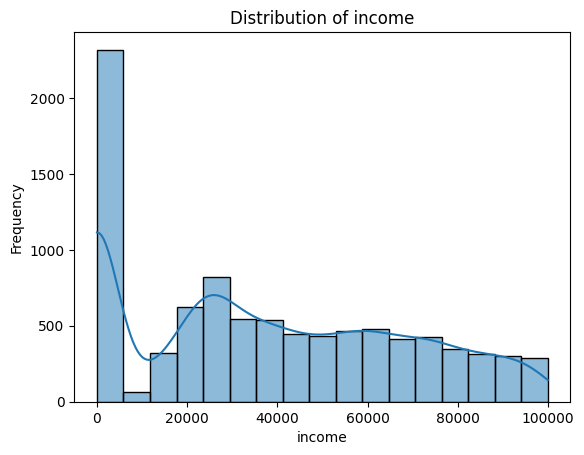

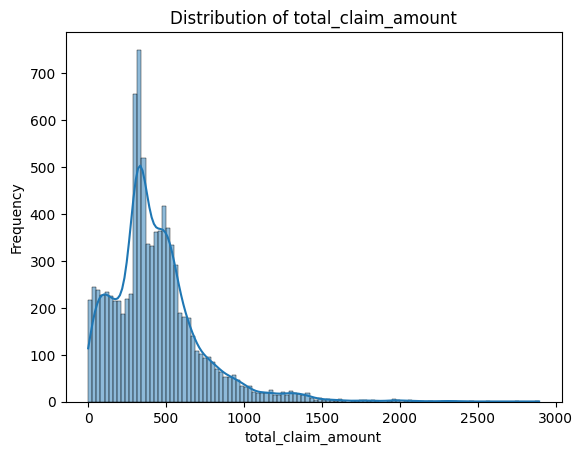

In [15]:
plot_continuous_var(continuous_df)

# Discrete variables: 

Monthly premium auto: there are a lot more people that pay a small amount every month but the range is larger

Month since last claim: it can indicate the risk profile for a customer, you might want to check how to deal with the customers have a higher risk profile in detail.

Month since policy inception: Seems to be evenly spread, this means we keep the customers we have for a while and acquire new customers

Number of open complaints: Most of the customers do not have an open complaint.

Number of policies: Most poeple have 1 to 3 policies. Customers with more policies might be mostly corporate customers.

# continous variables:

CLV: A lot of outliers here.

Income: A lot of people have a really low income, but when we first looked at the data there were some incomes with 0, it could be that NaN Values once were filled with 0. 

Total claim amount: We see some outliers, but since this is our target I do not want to delete any outliers here

<Axes: >

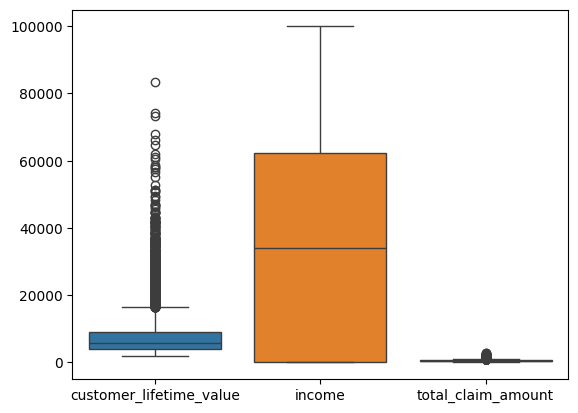

In [16]:
sns.boxplot(data=continuous_df)

In [17]:
#Remove outliers in customer lifetime value

iqr = np.percentile(continuous_df['customer_lifetime_value'],75) - np.percentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.percentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(continuous_df['customer_lifetime_value'],25) - 1.5*iqr
continuous_df = continuous_df[(continuous_df['customer_lifetime_value']>lower_limit) & (continuous_df['customer_lifetime_value']<upper_limit)]

<Axes: >

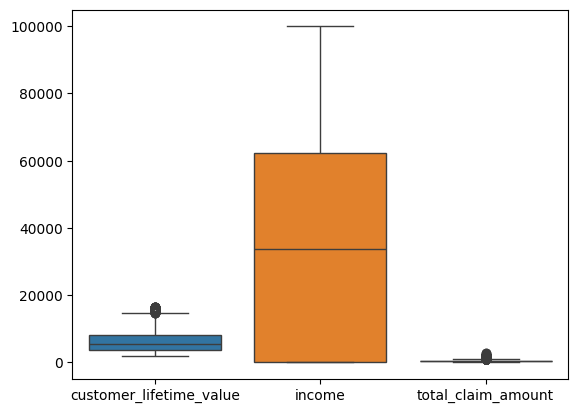

In [18]:
sns.boxplot(data=continuous_df)

In [19]:
# remove the outliers from the main dataframe and the numeric

numerical_df = numerical_df[(numerical_df['customer_lifetime_value']>lower_limit) & (numerical_df['customer_lifetime_value']<upper_limit)]
customer_df = customer_df[(customer_df['customer_lifetime_value']>lower_limit) & (customer_df['customer_lifetime_value']<upper_limit)]

In [20]:
# Check for NaN values

customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [21]:
numerical_df.to_csv('numerical.csv', index=False)

In [22]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## Cleaning categorical data

In [23]:
categorical_df = customer_df.select_dtypes(include = object)

In [24]:
# drop the customer column

categorical_df = categorical_df.drop(['customer'], axis=1)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [25]:
# Check for NaN values

categorical_df.isna().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [26]:
# Check for unqiue values

for col in categorical_df.columns:
    unique_values = categorical_df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values: {unique_values}")


Column: state
Unique values: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Column: response
Unique values: ['No' 'Yes']
Column: coverage
Unique values: ['Basic' 'Extended' 'Premium']
Column: education
Unique values: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Column: employmentstatus
Unique values: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Column: gender
Unique values: ['F' 'M']
Column: location_code
Unique values: ['Suburban' 'Rural' 'Urban']
Column: marital_status
Unique values: ['Married' 'Single' 'Divorced']
Column: policy_type
Unique values: ['Corporate Auto' 'Personal Auto' 'Special Auto']
Column: policy
Unique values: ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Column: renew_offer_type
Unique values: ['Offer1' 'Offer3' 'Offer2' 'Offer4']
Column: sales_channel
Unique values: ['Agent' 'Call Center' 'Web' 'Branch']
Column: vehicle_class
Unique valu

In [27]:
# Check value count

for col in categorical_df.columns:
    unique_values = categorical_df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values:")
    for value in unique_values:
        count = categorical_df[col].value_counts()[value]
        print(f" - {value}:{count}")
    print()

Column: state
Unique values:
 - Washington:716
 - Arizona:1565
 - Nevada:799
 - California:2869
 - Oregon:2368

Column: response
Unique values:
 - No:7123
 - Yes:1194

Column: coverage
Unique values:
 - Basic:5132
 - Extended:2462
 - Premium:723

Column: education
Unique values:
 - Bachelor:2505
 - College:2466
 - Master:671
 - High School or Below:2359
 - Doctor:316

Column: employmentstatus
Unique values:
 - Employed:5173
 - Unemployed:2116
 - Medical Leave:397
 - Disabled:374
 - Retired:257

Column: gender
Unique values:
 - F:4214
 - M:4103

Column: location_code
Unique values:
 - Suburban:5255
 - Rural:1616
 - Urban:1446

Column: marital_status
Unique values:
 - Married:4832
 - Single:2260
 - Divorced:1225

Column: policy_type
Unique values:
 - Corporate Auto:1795
 - Personal Auto:6190
 - Special Auto:332

Column: policy
Unique values:
 - Corporate L3:928
 - Personal L3:3121
 - Corporate L2:550
 - Personal L1:1137
 - Special L2:148
 - Corporate L1:317
 - Personal L2:1932
 - Special

At first glance, everything appears quite reasonable. The policy_type and policy seem similar, so these would be areas I would want to look at more closely.

In [28]:
#Check dtypes

categorical_df.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

Makes sense to keep them as categorical data.

In [29]:
# Check for alphanumeric data. Determine the cleaning method and execute it.

# There are two columns, policy and renew_offer_type. 
#We need to understand the meaning of policy before making changes, so we'll leave it as is for now.

# For renew_offer_type, we can simplify the categories by removing the word "Offer", 
# which effectively gives us an encoded category.

categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.replace("Offer","")
categorical_df['renew_offer_type'].unique()

array(['1', '3', '2', '4'], dtype=object)

In [30]:
# Similar to a previous lab, we can create a new category "Luxury" for vehicle_class.
# The vehicle_class and vehicle_size columns seem quite redundant. 
# Although the instructions did not specifically mention dropping columns, it's something we might consider.



categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(['Sports Car','Luxury SUV','Luxury Car']) , 'Luxury', categorical_df['vehicle_class'])
categorical_df['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    4331
Two-Door Car     1763
SUV              1584
Luxury            639
Name: count, dtype: int64

In [31]:
# I have also decided to combine 'medical leave' and 'disabled' into 'health_related_absence'. 
# Being on medical leave appears to be a permanent situation that prevents work, similar to having a disability.

# 'Retired' is another small category, but as it relates to age, it could be significantly correlated 
# with insurance factors, so I prefer not to group it with other categories.

categorical_df['employmentstatus'] = np.where(categorical_df['employmentstatus'].isin(['Medical Leave','Disabled']) , 'health related absence', categorical_df['employmentstatus'])
categorical_df['employmentstatus'].value_counts()


employmentstatus
Employed                  5173
Unemployed                2116
health related absence     771
Retired                    257
Name: count, dtype: int64

In [32]:
# In the education column I could merge Master and Doctor. I would argue that it kind of stands for the 
# same intellectual background and I would expect a high salary for both categories.

categorical_df['education'] = np.where(categorical_df['education'].isin(['Master','Doctor']) , 'Master or Doctor', categorical_df['education'])
categorical_df['education'].value_counts()


education
Bachelor                2505
College                 2466
High School or Below    2359
Master or Doctor         987
Name: count, dtype: int64

Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [33]:
# On Monday I just dropped the column policy. Since there is some useful information in it I would like to keep it in as we discussed in the Lab Review.

categorical_df['policy'] = categorical_df['policy'].str.replace(r'^\w+\s*', '', regex=True)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,L2,1,Branch,Four-Door Car,Large
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,3,Branch,Four-Door Car,Large


In [34]:
categorical_df.to_csv('categorical.csv', index=False)

## Lab | Feature extraction

In [35]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,L2,1,Branch,Four-Door Car,Large
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,3,Branch,Four-Door Car,Large


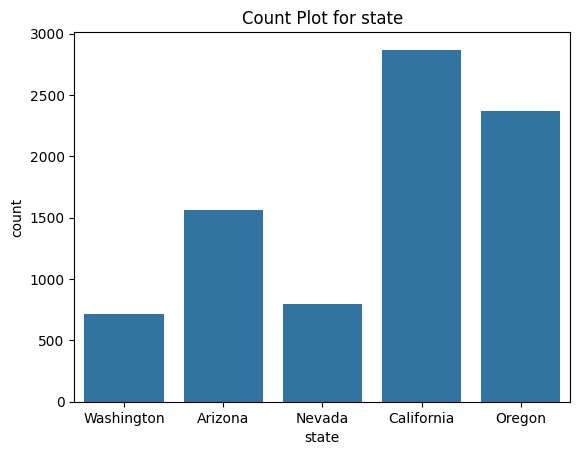

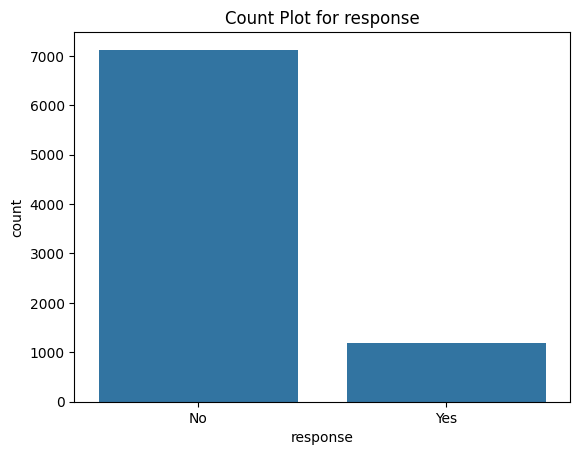

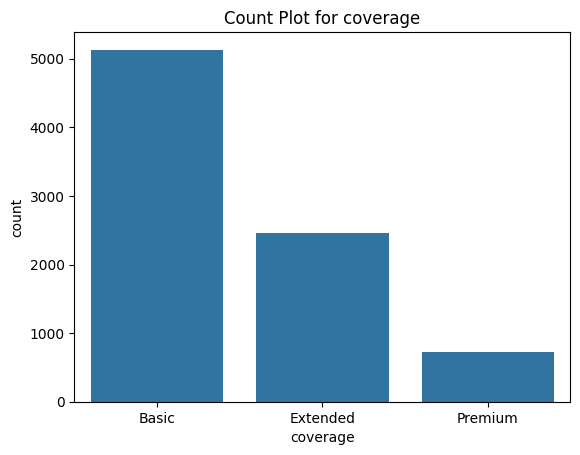

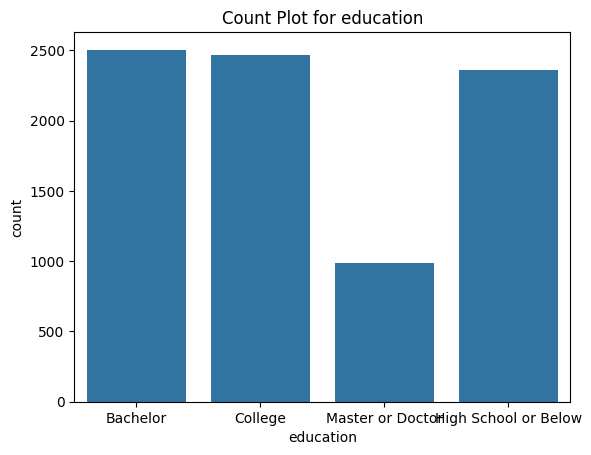

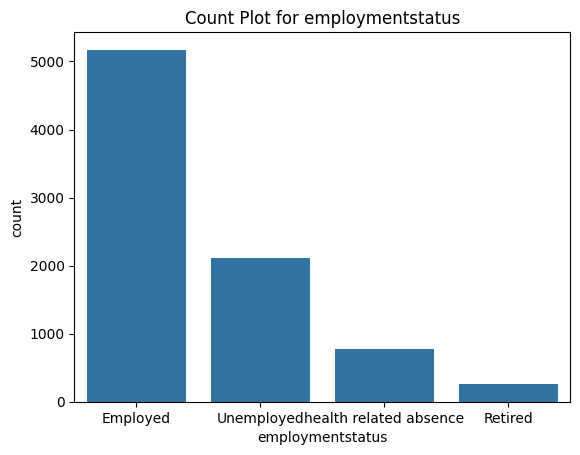

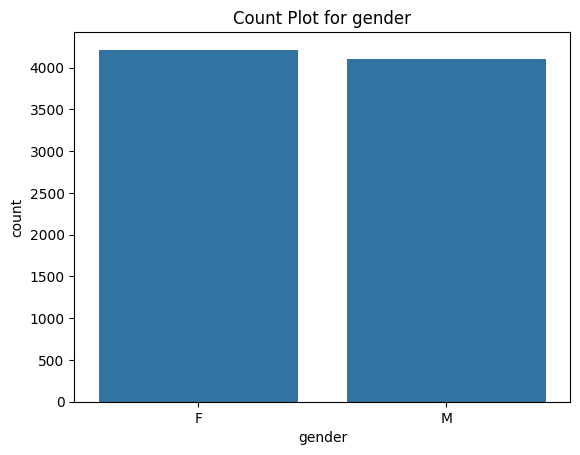

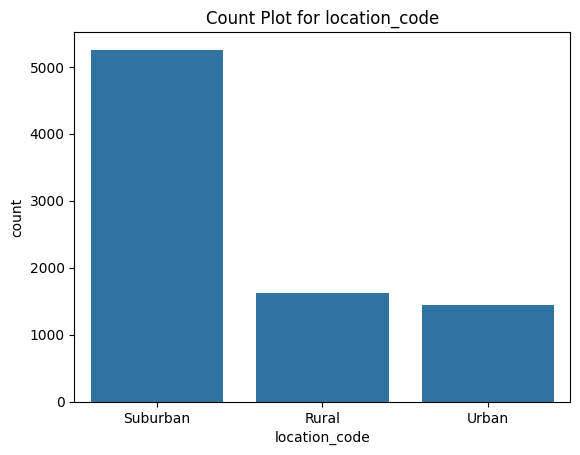

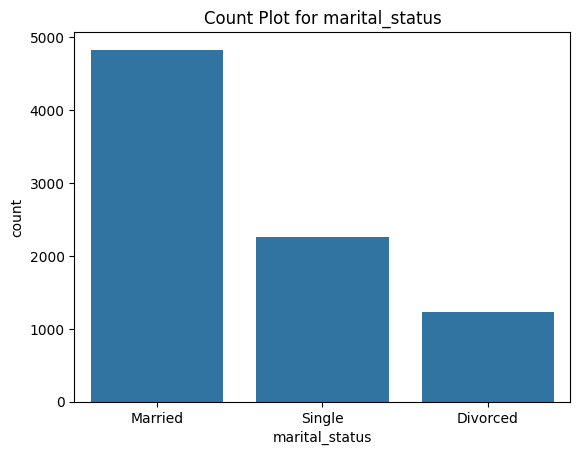

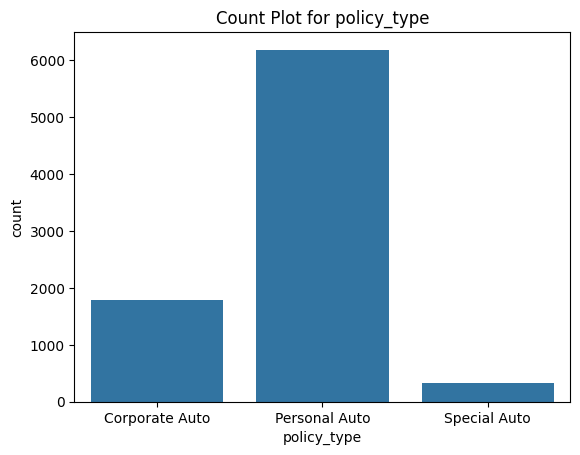

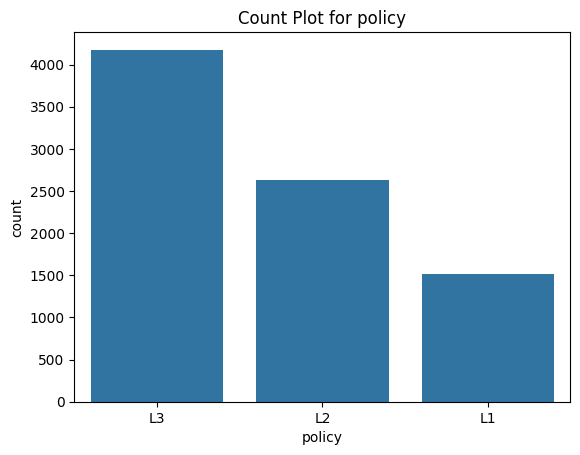

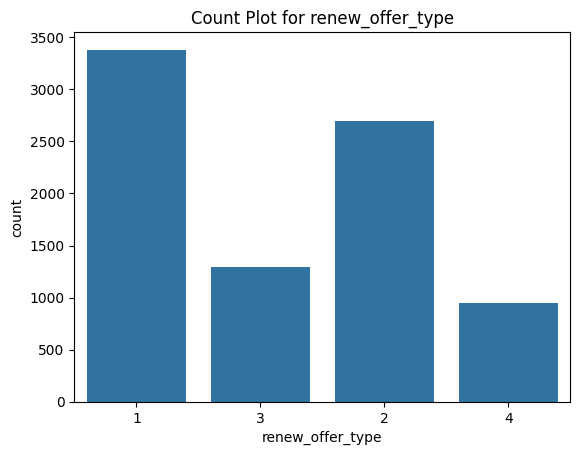

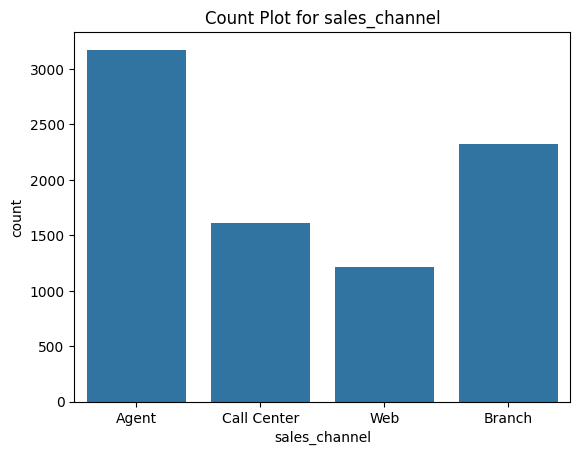

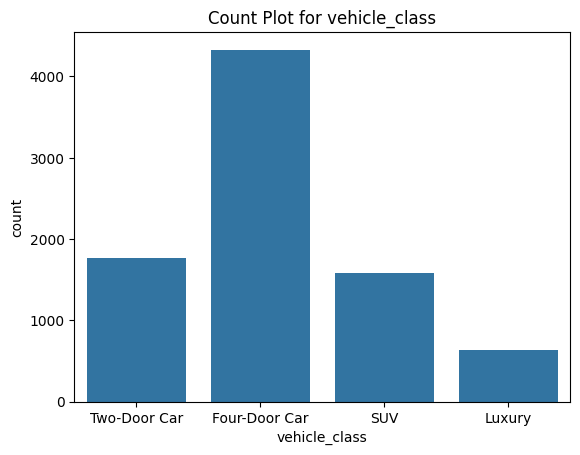

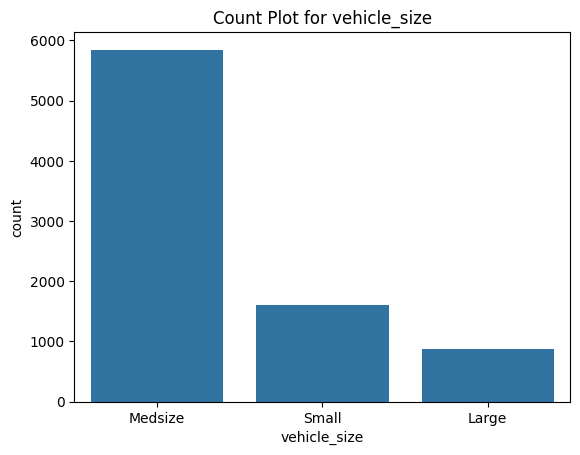

In [36]:
# We want to plot the categorical variables
for col in categorical_df.columns:
    sns.countplot(x=col, data=categorical_df)
    plt.title(f"Count Plot for {col}")
    plt.show()

In [ ]:
# We took care of all the redundant values in yesterdays Lab

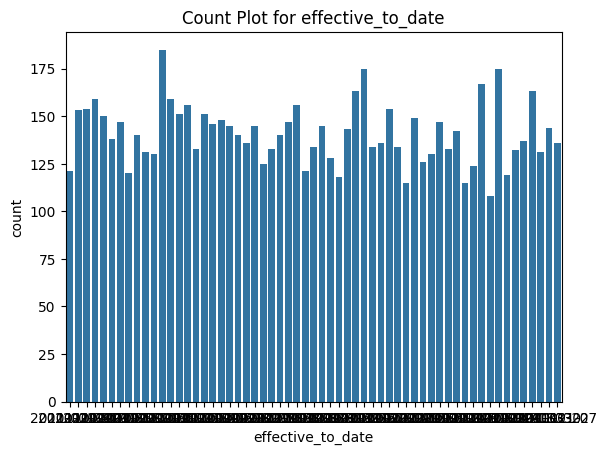

In [37]:
# Retrieve Time Column

sns.countplot(x="effective_to_date", data=customer_df)
plt.title(f"Count Plot for effective_to_date")
plt.show()

In [38]:

categorical_df['day'] = customer_df['effective_to_date'].dt.day
categorical_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
categorical_df['month'] = customer_df['effective_to_date'].dt.month
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,week,month
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,1,Agent,Two-Door Car,Medsize,24,8,2
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,3,Agent,Four-Door Car,Medsize,31,5,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,1,Agent,Two-Door Car,Medsize,19,7,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,1,Call Center,SUV,Medsize,20,3,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,1,Agent,Four-Door Car,Medsize,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,L2,1,Branch,Four-Door Car,Large,6,1,1
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,1,Branch,Four-Door Car,Medsize,12,6,2
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,1,Branch,Four-Door Car,Medsize,6,5,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,3,Branch,Four-Door Car,Large,3,5,2


In [39]:
# save again in the csv file.
categorical_df.to_csv('categorical.csv', index=False)

## Lab | Comparing regression models

In [40]:
#Before we encode the data we need to make the Train-test split

# 1. Get one Feature dataset again
data = pd.concat([numerical_df, categorical_df], axis=1)

X = data.drop(['total_claim_amount'],axis=1)
y = data['total_claim_amount']

In [41]:
# 2. Select random test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# 3. Split X into numerical and categorical for the encoding

X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)

X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

In [43]:
# 4. Scale numerical data 
# Train MinMaxScaler on Train data and transform data.

from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num)
x_normalized_train = transformer.transform(X_train_num)
print(x_normalized_train.shape)
pd.DataFrame(x_normalized_train, columns=X_train_num.columns)

(6653, 10)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day,week,month
0,0.216203,0.374196,0.008439,0.228571,1.000000,0.6,0.375,0.433333,0.117647,1.0
1,0.873161,0.000000,0.367089,0.228571,0.181818,0.0,0.125,0.366667,0.019608,0.0
2,0.824818,0.535049,0.037975,0.342857,0.121212,0.0,0.125,0.633333,0.117647,1.0
3,0.346471,0.889277,0.105485,0.142857,0.636364,0.0,1.000,0.133333,0.078431,1.0
4,0.861374,0.000000,0.607595,0.400000,0.636364,0.0,0.375,0.133333,0.078431,1.0
...,...,...,...,...,...,...,...,...,...,...
6648,0.228880,0.213793,0.021097,0.371429,0.484848,0.0,0.875,0.866667,0.137255,1.0
6649,0.334227,0.267314,0.016878,0.514286,0.646465,0.6,0.125,0.266667,0.098039,1.0
6650,0.195883,0.000000,0.046414,0.114286,0.616162,0.2,0.375,0.500000,0.019608,0.0
6651,0.196330,0.151749,0.008439,0.971429,0.151515,0.0,0.250,0.900000,0.058824,0.0


In [44]:
# Transform the test data.
x_normalized_test = transformer.transform(X_test_num)
print(x_normalized_test.shape)
pd.DataFrame(x_normalized_test, columns=X_test_num.columns)

(1664, 10)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day,week,month
0,0.180965,0.749642,0.215190,0.428571,0.626263,0.0,0.000,0.400000,0.098039,1.0
1,0.062435,0.232291,0.054852,0.085714,0.737374,0.0,0.000,0.900000,0.058824,0.0
2,0.115359,0.749602,0.118143,0.371429,0.161616,0.0,0.000,0.266667,0.000000,0.0
3,0.097464,0.274417,0.101266,0.057143,0.393939,0.0,0.000,0.933333,0.058824,0.0
4,0.254942,0.380098,0.329114,0.457143,0.505051,0.0,0.000,0.866667,0.058824,0.0
...,...,...,...,...,...,...,...,...,...,...
1659,0.354107,0.866758,0.109705,0.400000,0.121212,0.0,1.000,0.600000,0.039216,0.0
1660,0.450466,0.277048,0.198312,0.085714,0.030303,0.0,0.750,0.100000,0.000000,0.0
1661,0.183886,0.000000,0.029536,0.542857,0.535354,0.0,0.250,0.233333,0.098039,1.0
1662,0.248894,0.342494,0.037975,0.085714,0.878788,0.0,0.875,0.333333,0.098039,1.0


In [45]:
X_train_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
8874,California,No,Basic,Master or Doctor,Employed,F,Urban,Married,Corporate Auto,L2,2,Branch,Four-Door Car,Medsize
1024,Arizona,No,Premium,Bachelor,Unemployed,M,Suburban,Single,Personal Auto,L2,1,Agent,SUV,Medsize
5321,Washington,No,Basic,College,Employed,F,Urban,Divorced,Corporate Auto,L3,1,Branch,Two-Door Car,Medsize
7027,California,No,Extended,Bachelor,Employed,F,Rural,Married,Personal Auto,L3,2,Call Center,Four-Door Car,Small
5195,Oregon,No,Extended,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,L1,1,Call Center,Luxury,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,California,No,Basic,Bachelor,Employed,M,Suburban,Married,Personal Auto,L2,2,Branch,Four-Door Car,Small
5686,Oregon,No,Basic,High School or Below,health related absence,M,Suburban,Divorced,Personal Auto,L2,2,Agent,Four-Door Car,Medsize
5907,Oregon,No,Basic,College,Unemployed,M,Suburban,Single,Personal Auto,L3,3,Web,Four-Door Car,Medsize
939,California,No,Basic,High School or Below,health related absence,F,Suburban,Married,Personal Auto,L3,4,Web,Four-Door Car,Medsize


In [46]:
# 5. Encode categorical data
# Fit and use OneHotEncoder for Train data.
# First I need to split the data for the oridnal and One Hot Encoding.

X_train_cat_ohe = X_train_cat[['state','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class','response','gender']]
X_train_cat_o = X_train_cat[['coverage','employmentstatus','location_code','vehicle_size','education']]

X_test_cat_ohe = X_test_cat[['state','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class','response','gender']]
X_test_cat_o = X_test_cat[['coverage','employmentstatus','location_code','vehicle_size','education']]

In [47]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat_ohe)
cols = encoder.get_feature_names_out(input_features=X_train_cat_ohe.columns)
X_cat_encode = pd.DataFrame(encoder.transform(X_train_cat_ohe).toarray(),columns=cols)
X_cat_encode

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_L2,policy_L3,...,renew_offer_type_3,renew_offer_type_4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,response_Yes,gender_M
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6648,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6649,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6650,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6651,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Using OneHotEncoder for Test data.

X_cat_encode_test = pd.DataFrame(encoder.transform(X_test_cat_ohe).toarray(),columns=cols)
X_cat_encode_test

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_L2,policy_L3,...,renew_offer_type_3,renew_offer_type_4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,response_Yes,gender_M
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1660,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1661,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1662,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
# Fit and use Ordinal Encoder for Train data.

X_train_cat_o["coverage"] = X_train_cat_o["coverage"].map({"Basic" : 0, "Extended" :.5, "Premium" : 1})
X_train_cat_o["employmentstatus"] = X_train_cat_o["employmentstatus"].map({"health related absence" : 0, "Unemployed" : 0, "Retired" : .5, "Employed":2})
X_train_cat_o["location_code"] = X_train_cat_o["location_code"].map({"Rural" : 0, "Suburban" :.5, "Urban" : 1,})
X_train_cat_o["vehicle_size"] = X_train_cat_o["vehicle_size"].map({"Small" : 0, "Medsize" :.5, "Large" : 1,})
X_train_cat_o["education"] = X_train_cat_o["education"].map({"High School or Below" : 0, "Bachelor" : .5, "College":.5, "Master or Doctor" : 1})
X_train_cat_o

C:\Users\jorda\AppData\Local\Temp\ipykernel_4320\2008716652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_o["coverage"] = X_train_cat_o["coverage"].map({"Basic" : 0, "Extended" :.5, "Premium" : 1})
C:\Users\jorda\AppData\Local\Temp\ipykernel_4320\2008716652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_o["employmentstatus"] = X_train_cat_o["employmentstatus"].map({"health related absence" : 0, "Unemployed" : 0, "Retired" : .5, "Employed":2})
C:\Users\jorda\AppData\Local\T

,coverage,employmentstatus,location_code,vehicle_size,education
8874,0.0,2.0,1.0,0.5,1.0
1024,1.0,0.0,0.5,0.5,0.5
5321,0.0,2.0,1.0,0.5,0.5
7027,0.5,2.0,0.0,0.0,0.5
5195,0.5,0.0,0.5,0.5,0.0
...,...,...,...,...,...
6292,0.0,2.0,0.5,0.0,0.5
5686,0.0,0.0,0.5,0.5,0.0
5907,0.0,0.0,0.5,0.5,0.5
939,0.0,0.0,0.5,0.5,0.0


In [50]:
X_test_cat_o

,coverage,employmentstatus,location_code,vehicle_size,education
8119,Basic,Employed,Rural,Medsize,High School or Below
801,Basic,health related absence,Urban,Medsize,Bachelor
8277,Extended,Employed,Urban,Large,Bachelor
6135,Extended,health related absence,Suburban,Medsize,High School or Below
2543,Extended,Employed,Suburban,Medsize,High School or Below
...,...,...,...,...,...
5979,Extended,Employed,Urban,Small,High School or Below
8446,Basic,Employed,Suburban,Small,College
7762,Basic,Unemployed,Suburban,Medsize,Bachelor
3446,Basic,Employed,Suburban,Small,Bachelor


In [51]:
# now we do the same for the test data
X_test_cat_o["coverage"] = X_test_cat_o["coverage"].map({"Basic" : 0, "Extended" :.5, "Premium" : 1})
X_test_cat_o["employmentstatus"] = X_test_cat_o["employmentstatus"].map({"health related absence" : 0, "Unemployed" : 0, "Retired" : .5, "Employed":2})
X_test_cat_o["location_code"] = X_test_cat_o["location_code"].map({"Rural" : 0, "Suburban" :.5, "Urban" : 1,})
X_test_cat_o["vehicle_size"] = X_test_cat_o["vehicle_size"].map({"Small" : 0, "Medsize" :.5, "Large" : 1,})
X_test_cat_o["education"] = X_test_cat_o["education"].map({"High School or Below" : 0, "Bachelor" : .5, "College":.5, "Master or Doctor" : 1})
X_test_cat_o

C:\Users\jorda\AppData\Local\Temp\ipykernel_4320\207911002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_o["coverage"] = X_test_cat_o["coverage"].map({"Basic" : 0, "Extended" :.5, "Premium" : 1})
C:\Users\jorda\AppData\Local\Temp\ipykernel_4320\207911002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_o["employmentstatus"] = X_test_cat_o["employmentstatus"].map({"health related absence" : 0, "Unemployed" : 0, "Retired" : .5, "Employed":2})
C:\Users\jorda\AppData\Local\Temp\ip

,coverage,employmentstatus,location_code,vehicle_size,education
8119,0.0,2.0,0.0,0.5,0.0
801,0.0,0.0,1.0,0.5,0.5
8277,0.5,2.0,1.0,1.0,0.5
6135,0.5,0.0,0.5,0.5,0.0
2543,0.5,2.0,0.5,0.5,0.0
...,...,...,...,...,...
5979,0.5,2.0,1.0,0.0,0.0
8446,0.0,2.0,0.5,0.0,0.5
7762,0.0,0.0,0.5,0.5,0.5
3446,0.0,2.0,0.5,0.0,0.5


In [52]:
# Now, put everything back

X_train = np.concatenate((x_normalized_train,X_cat_encode,X_train_cat_o),axis=1)
X_test = np.concatenate((x_normalized_test,X_cat_encode_test,X_test_cat_o),axis=1)

In [53]:
# Build the Linear Model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_train)
display(r2_score(y_train, predictions))

predictions_test = lm.predict(X_test)
display(r2_score(y_test, predictions_test))

0.6169400068301485

0.5918883482921176

The result loosk already quite good with an r2 score of 0.59 for the test data.

In [54]:
# Define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


# Define the models
linear_regressor = LinearRegression()
knn_regressor = KNeighborsRegressor()
mlp_regressor = MLPRegressor()

# Put the models in a list
models = [linear_regressor, knn_regressor, mlp_regressor]

# Define a function to train and test the models
def train_and_test_models(models, train_data, test_data):
    results = {}

    for model in models:
        # Train the model
        model.fit(train_data[0], train_data[1])

        # Test the model
        predictions = model.predict(test_data[0])
        mse = mean_squared_error(test_data[1], predictions)
        r2 = r2_score(test_data[1], predictions)

        # Store the results
        results[model.__class__.__name__] = {'MSE': mse, 'R2': r2}

    return results

# Call the function to train and test the models
results = train_and_test_models(models, (X_train, y_train), (X_test, y_test))

print("Evaluation Scores:")
for model, scores in results.items():
    print(f"{model}:")
    print(f"  MSE: {scores['MSE']}")
    print(f"  R2 Score: {scores['R2']}")

Evaluation Scores:
LinearRegression:
  MSE: 28351.134029577726
  R2 Score: 0.5918883482921176
KNeighborsRegressor:
  MSE: 39330.42683974752
  R2 Score: 0.4338425601177103
MLPRegressor:
  MSE: 24559.876626597597
  R2 Score: 0.6464631077767209


c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


As we can see the r2 scores from the 3 different methods vary quite a bit. We get the highest R2 Score for the MLPRegressor.

## Lab | Random variable distributions

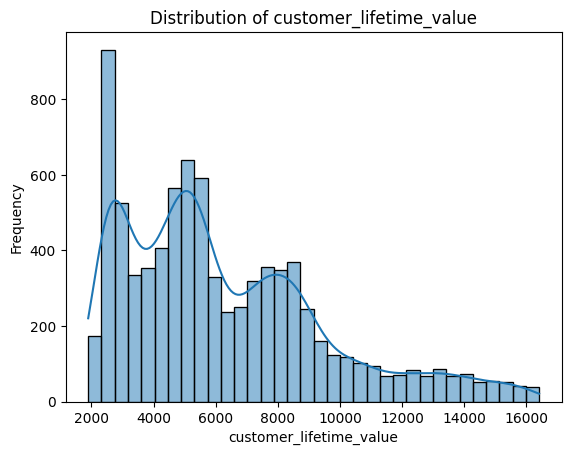

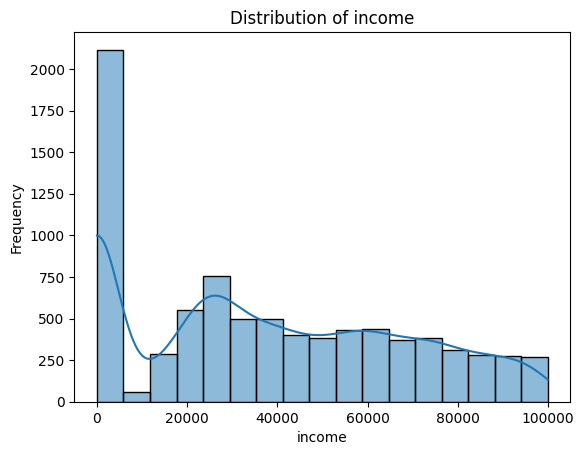

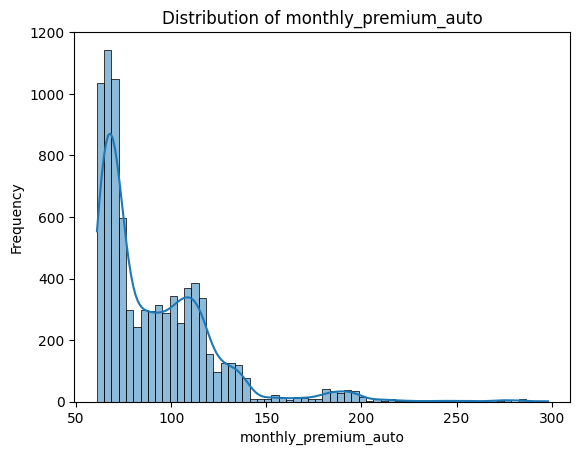

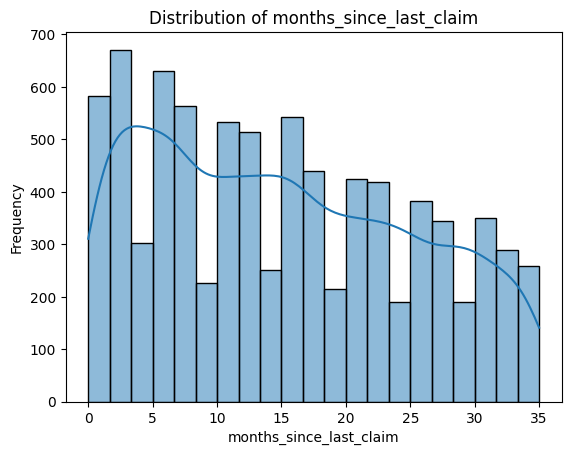

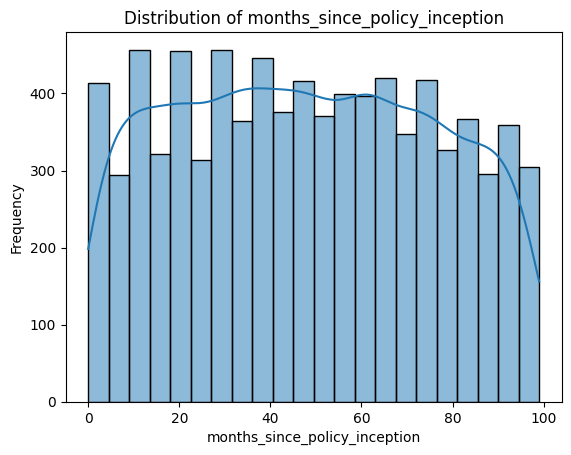

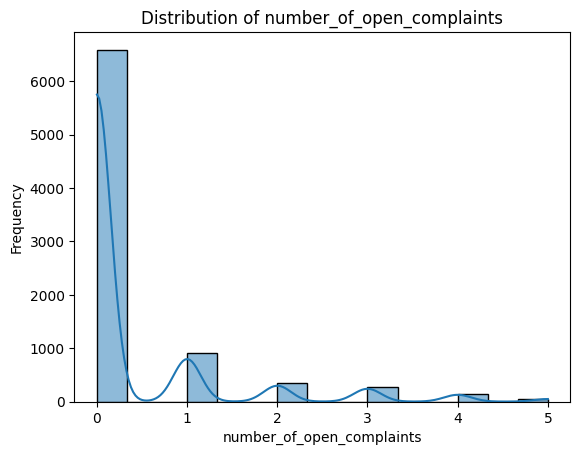

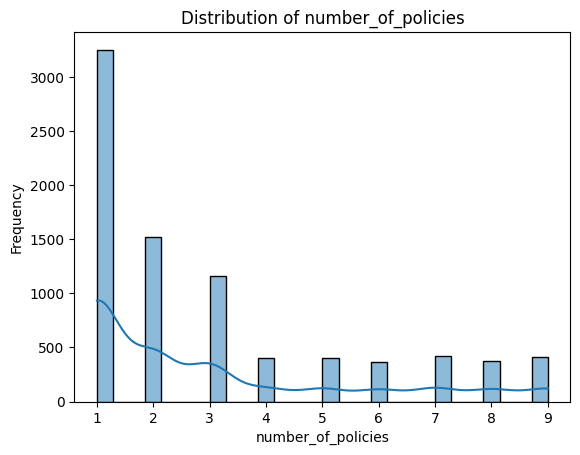

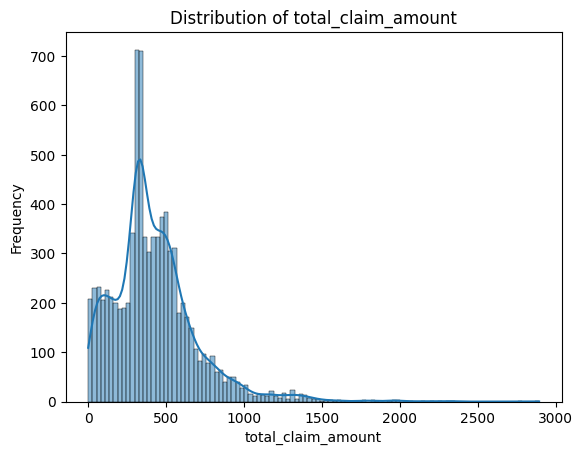

In [55]:
def plot_numerical_var(df):
    for col in df.columns:
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()
        
plot_numerical_var(numerical_df)


In [ ]:
# Nothing looks like a normal distribution.

In [56]:
# Use log transformation to see if I an get a normal distribution.

numerical_df_log = pd.DataFrame()

for column in numerical_df:
    numerical_df_log[column] = np.log(numerical_df[column])
    
numerical_df_log

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,-inf,0.000000,5.952753
1,8.850738,-inf,4.543295,2.564949,3.737670,-inf,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,-inf,0.693147,6.339428
3,8.941920,-inf,4.663439,2.890372,4.174387,-inf,1.945910,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,-inf,0.000000,4.928202
...,...,...,...,...,...,...,...,...
9128,8.318839,10.773965,4.644391,2.772589,4.060443,-inf,0.000000,6.293940
9130,8.038031,9.980634,4.369448,2.639057,3.332205,-inf,0.000000,5.938064
9131,9.007476,-inf,4.442651,2.197225,3.610918,1.098612,0.693147,6.673026
9132,8.925912,9.996112,4.564348,3.526361,1.098612,-inf,1.098612,6.538429


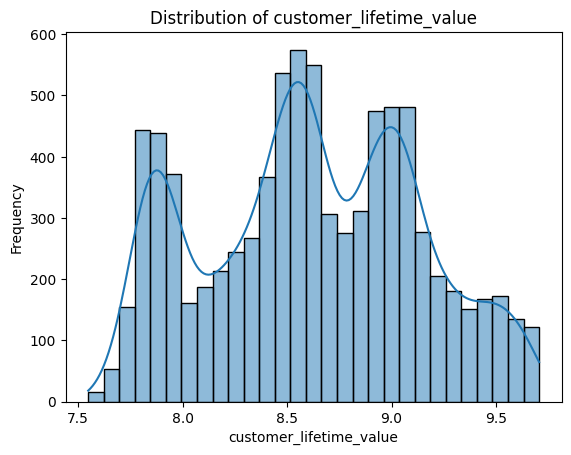

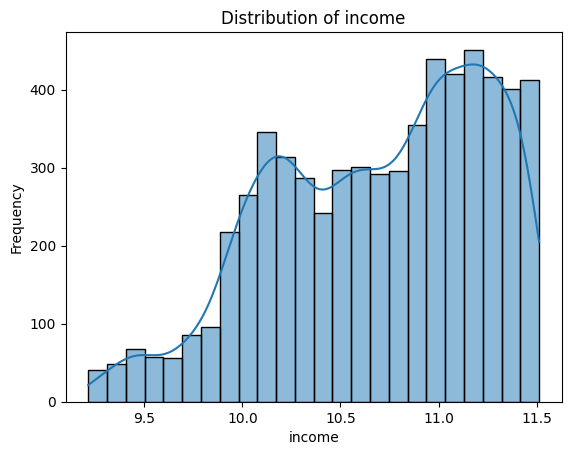

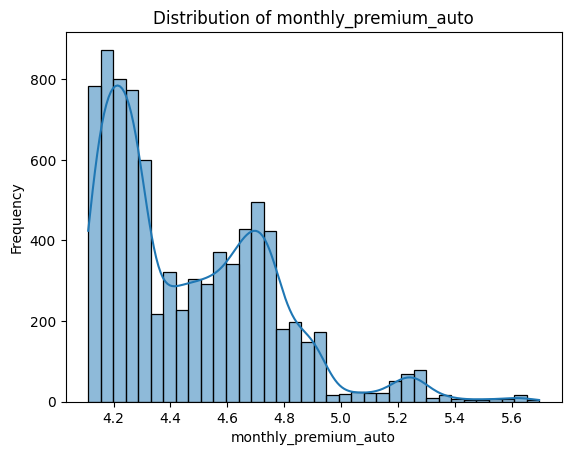

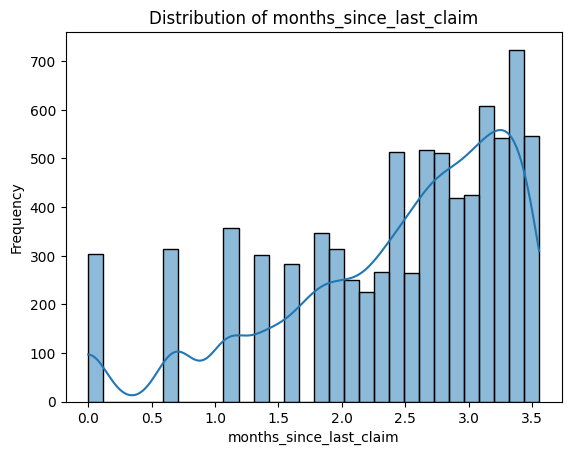

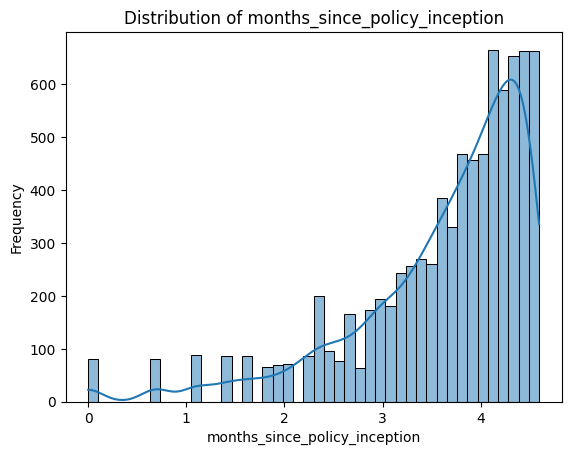

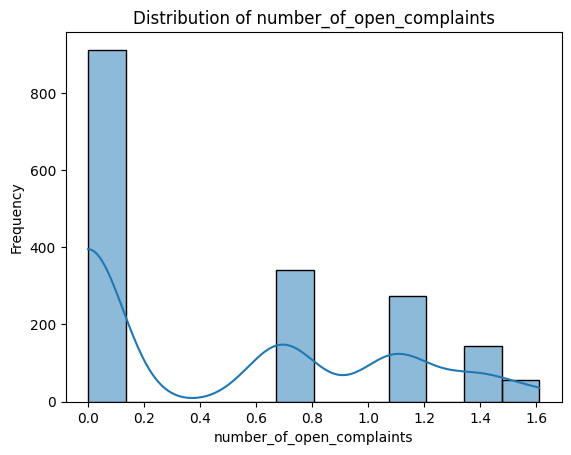

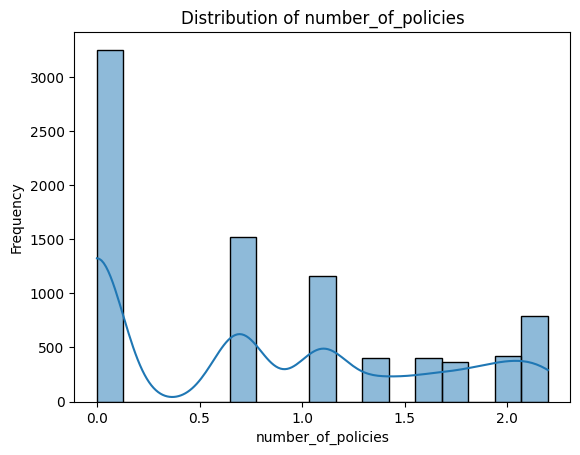

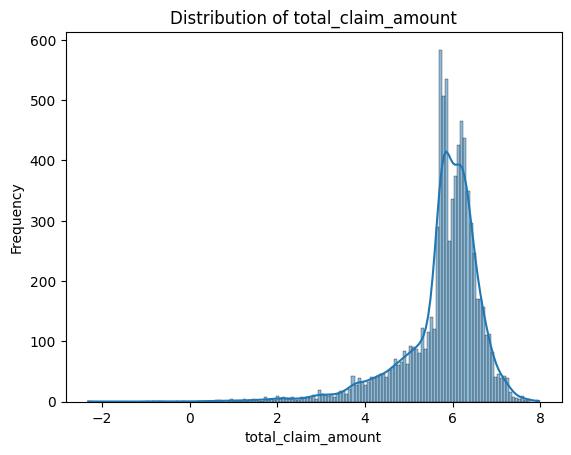

In [57]:
plot_numerical_var(numerical_df_log)

The distirbution changed but still nothing really looks like a normal distribution.